In [1]:
#import Lib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Load Data
df = pd.read_csv("Cars.csv")
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


For the feature owner, map First owner to 1, ..., Test Drive Car to 5

In [3]:
df['owner'].value_counts()

First Owner             5289
Second Owner            2105
Third Owner              555
Fourth & Above Owner     174
Test Drive Car             5
Name: owner, dtype: int64

In [4]:
label_mapping = {'First Owner': 1, 'Second Owner': 2, 'Third Owner': 3, 'Fourth & Above Owner': 4, 'Test Drive Car': 5}
df['owner'] = df['owner'].map(label_mapping)

In [5]:
#Doesnt Work mapping was not ordered

# from sklearn.preprocessing import LabelEncoder
# label_mapping = {'First Owner': 1, 'Second Owner': 2, 'Third Owner': 3, 'Fourth & Above Owner': 4, 'Test Drive Car': 5}
# le = LabelEncoder()
# le.fit(list(label_mapping.keys()))
# # le.classes_ = np.array(list(label_mapping.keys()))
# df['owner'] = le.transform(df['owner']) + 1

In [6]:
df['owner'].value_counts()

1    5289
2    2105
3     555
4     174
5       5
Name: owner, dtype: int64

For the feature fuel, remove all rows with CNG and LPG because CNG and LPG use a different
mileage system i.e., km/kg which is different from kmfeaturepl for Diesel and Petrol

In [7]:
df['fuel'].unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [8]:
mask = (df['fuel'] != 'CNG') & (df['fuel'] != 'LPG')
df = df[mask]

In [9]:
df['fuel'].value_counts()

Diesel    4402
Petrol    3631
Name: fuel, dtype: int64

For the feature mileage, remove “kmpl” and convert the column to numerical type (e.g., float).
Hint: use df.mileage.str.split

In [10]:
df['mileage'].head()

0     23.4 kmpl
1    21.14 kmpl
2     17.7 kmpl
3     23.0 kmpl
4     16.1 kmpl
Name: mileage, dtype: object

In [11]:
print(df.mileage.str.split(" "))

0        [23.4, kmpl]
1       [21.14, kmpl]
2        [17.7, kmpl]
3        [23.0, kmpl]
4        [16.1, kmpl]
            ...      
8123     [18.5, kmpl]
8124     [16.8, kmpl]
8125     [19.3, kmpl]
8126    [23.57, kmpl]
8127    [23.57, kmpl]
Name: mileage, Length: 8033, dtype: object


In [12]:
#Use the first column of string split (splitting by whitespace) in mileage then change type to float64
df['mileage'] = df.mileage.str.split(" ",expand=True)[0]
df['mileage'] = df['mileage'].astype(float)

In [13]:
df['mileage'].dtypes

dtype('float64')

For the feature engine, remove “CC” and convert the column to numerical type (e.g., float)


In [14]:
df['engine'].head()

0    1248 CC
1    1498 CC
2    1497 CC
3    1396 CC
4    1298 CC
Name: engine, dtype: object

In [15]:
#Use the first column of string split (splitting by whitespace) in engine then change type to float64
df['engine'] = df.engine.str.split(" ",expand=True)[0]
df['engine'] = df['engine'].astype(float)

In [16]:
df['engine']

0       1248.0
1       1498.0
2       1497.0
3       1396.0
4       1298.0
         ...  
8123    1197.0
8124    1493.0
8125    1248.0
8126    1396.0
8127    1396.0
Name: engine, Length: 8033, dtype: float64

In [17]:
df['engine'].dtypes

dtype('float64')

Do the same for max power


In [18]:
df['max_power']

0           74 bhp
1       103.52 bhp
2           78 bhp
3           90 bhp
4         88.2 bhp
           ...    
8123     82.85 bhp
8124       110 bhp
8125      73.9 bhp
8126        70 bhp
8127        70 bhp
Name: max_power, Length: 8033, dtype: object

In [19]:
#Use the first column of string split (splitting by whitespace) in max_power then change type to float64
df['max_power'] = df.max_power.str.split(" ",expand=True)[0]
df['max_power'] = df['max_power'].astype(float)

In [20]:
df['max_power']

0        74.00
1       103.52
2        78.00
3        90.00
4        88.20
         ...  
8123     82.85
8124    110.00
8125     73.90
8126     70.00
8127     70.00
Name: max_power, Length: 8033, dtype: float64

In [21]:
df['max_power'].dtypes

dtype('float64')

For the feature brand, take only the first word and remove the rest


In [22]:
df['name']

0             Maruti Swift Dzire VDI
1       Skoda Rapid 1.5 TDI Ambition
2           Honda City 2017-2020 EXi
3          Hyundai i20 Sportz Diesel
4             Maruti Swift VXI BSIII
                    ...             
8123               Hyundai i20 Magna
8124           Hyundai Verna CRDi SX
8125          Maruti Swift Dzire ZDi
8126                 Tata Indigo CR4
8127                 Tata Indigo CR4
Name: name, Length: 8033, dtype: object

In [23]:
#Use the first column of string split (splitting by whitespace) in name
df['name'] = df.name.str.split(" ",expand=True)[0]

In [24]:
df['name']

0        Maruti
1         Skoda
2         Honda
3       Hyundai
4        Maruti
         ...   
8123    Hyundai
8124    Hyundai
8125     Maruti
8126       Tata
8127       Tata
Name: name, Length: 8033, dtype: object

Drop the feature torque, simply because Chaky’s company does not understand well about it 

In [25]:
df.shape

(8033, 13)

In [26]:
#Ok We got it Boss
df = df.drop(columns='torque')

In [27]:
df.shape

(8033, 12)

In [28]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats'],
      dtype='object')

You will found out that Test Drive Cars are ridiculously expensive. Since we do not want to
involve this, we will simply delete all samples related to it

In [29]:
df['owner'].value_counts()

1    5238
2    2073
3     547
4     170
5       5
Name: owner, dtype: int64

In [30]:
#Since Test Drive Car was labeled as 5, we remove all class 5 rows
mask = df['owner']!=5
mask.value_counts()

True     8028
False       5
Name: owner, dtype: int64

In [31]:
df = df[mask]
df.shape #Was (8033,12)

(8028, 12)

EDA Time

In [32]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats'],
      dtype='object')

In [33]:
df.describe()

,year,selling_price,km_driven,owner,mileage,engine,max_power,seats
count,8028.000000,8.028000e+03,8.028000e+03,8028.000000,7814.000000,7814.000000,7820.000000,7814.000000
mean,2013.815521,6.403937e+05,6.977314e+04,1.458022,19.391962,1462.914640,91.819726,5.421551
std,4.030836,8.027015e+05,5.664419e+04,0.715283,4.001972,504.759742,35.804513,0.963125
min,1983.000000,2.999900e+04,1.000000e+03,1.000000,0.000000,624.000000,0.000000,2.000000
25%,2011.000000,2.600000e+05,3.500000e+04,1.000000,16.780000,1197.000000,68.850000,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,1.000000,19.300000,1248.000000,82.400000,5.000000
75%,2017.000000,6.800000e+05,9.800000e+04,2.000000,22.320000,1582.000000,102.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,4.000000,42.000000,3604.000000,400.000000,14.000000


In [34]:
print(df[df['max_power'] == 0])
#Make Note that we found some data = 0 in max_power column

        name  year  selling_price  km_driven    fuel seller_type transmission  \
575   Maruti  2011         204999      97500  Petrol  Individual       Manual   
576   Maruti  2011         204999      97500  Petrol  Individual       Manual   
1442  Maruti  2017         589000      41232  Diesel      Dealer       Manual   
1443  Maruti  2017         589000      41232  Diesel      Dealer       Manual   
2549    Tata  2012         240000      70000  Diesel  Individual       Manual   
2550    Tata  2012         240000      70000  Diesel  Individual       Manual   

      owner  mileage  engine  max_power  seats  
575       1      NaN     NaN        0.0    NaN  
576       1      NaN     NaN        0.0    NaN  
1442      1      NaN     NaN        0.0    NaN  
1443      1      NaN     NaN        0.0    NaN  
2549      1      NaN     NaN        0.0    NaN  
2550      1      NaN     NaN        0.0    NaN  


c:\Users\note3\OneDrive\Desktop\Chaklam's ML\.venv\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
c:\Users\note3\OneDrive\Desktop\Chaklam's ML\.venv\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
c:\Users\note3\OneDrive\Desktop\Chaklam's ML\.venv\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
c:\Users\note3\OneDrive\Desktop\Chaklam's ML\.venv\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
c:\Users\note3\OneDrive\Desktop\Chaklam's ML\.venv\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning:

<Axes: xlabel='x', ylabel='y'>

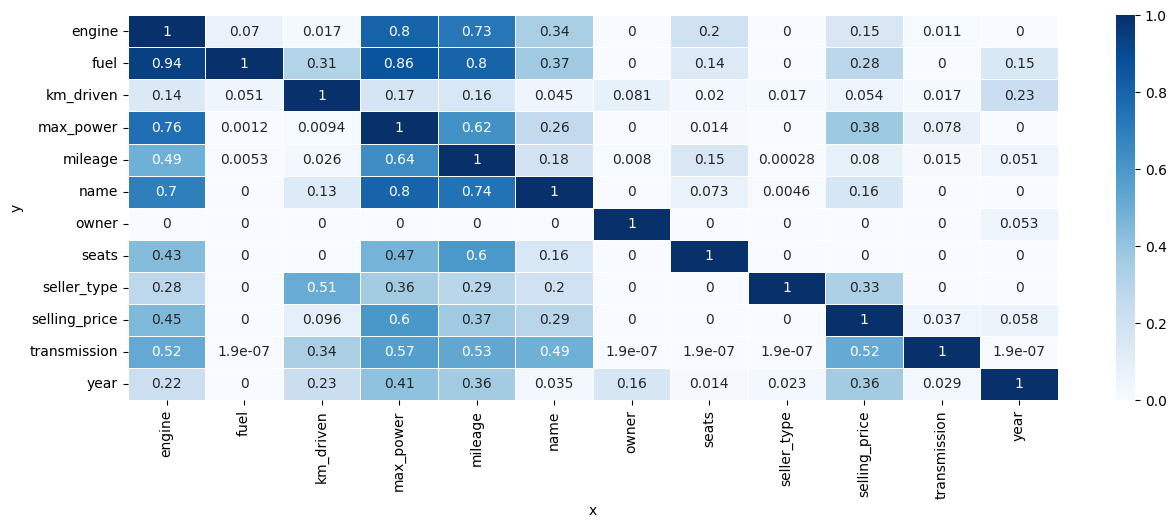

In [35]:
import ppscore as pps

# remove any unnecessary x
dfcopy = df.copy()
# dfcopy.drop(['name','fuel','seller_type','transmission'], axis='columns', inplace=True)

# call ppscore
matrix_df = pps.matrix(dfcopy)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore') 
# Selects only the 'x', 'y', and 'ppscore' columns from the PPS matrix.

# plot
plt.figure(figsize=(15,5))
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)


<Axes: xlabel='transmission', ylabel='selling_price'>

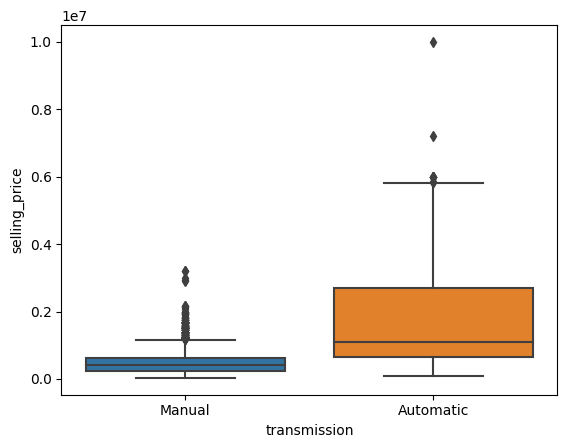

In [36]:
sns.boxplot(x='transmission', y='selling_price', data=df)

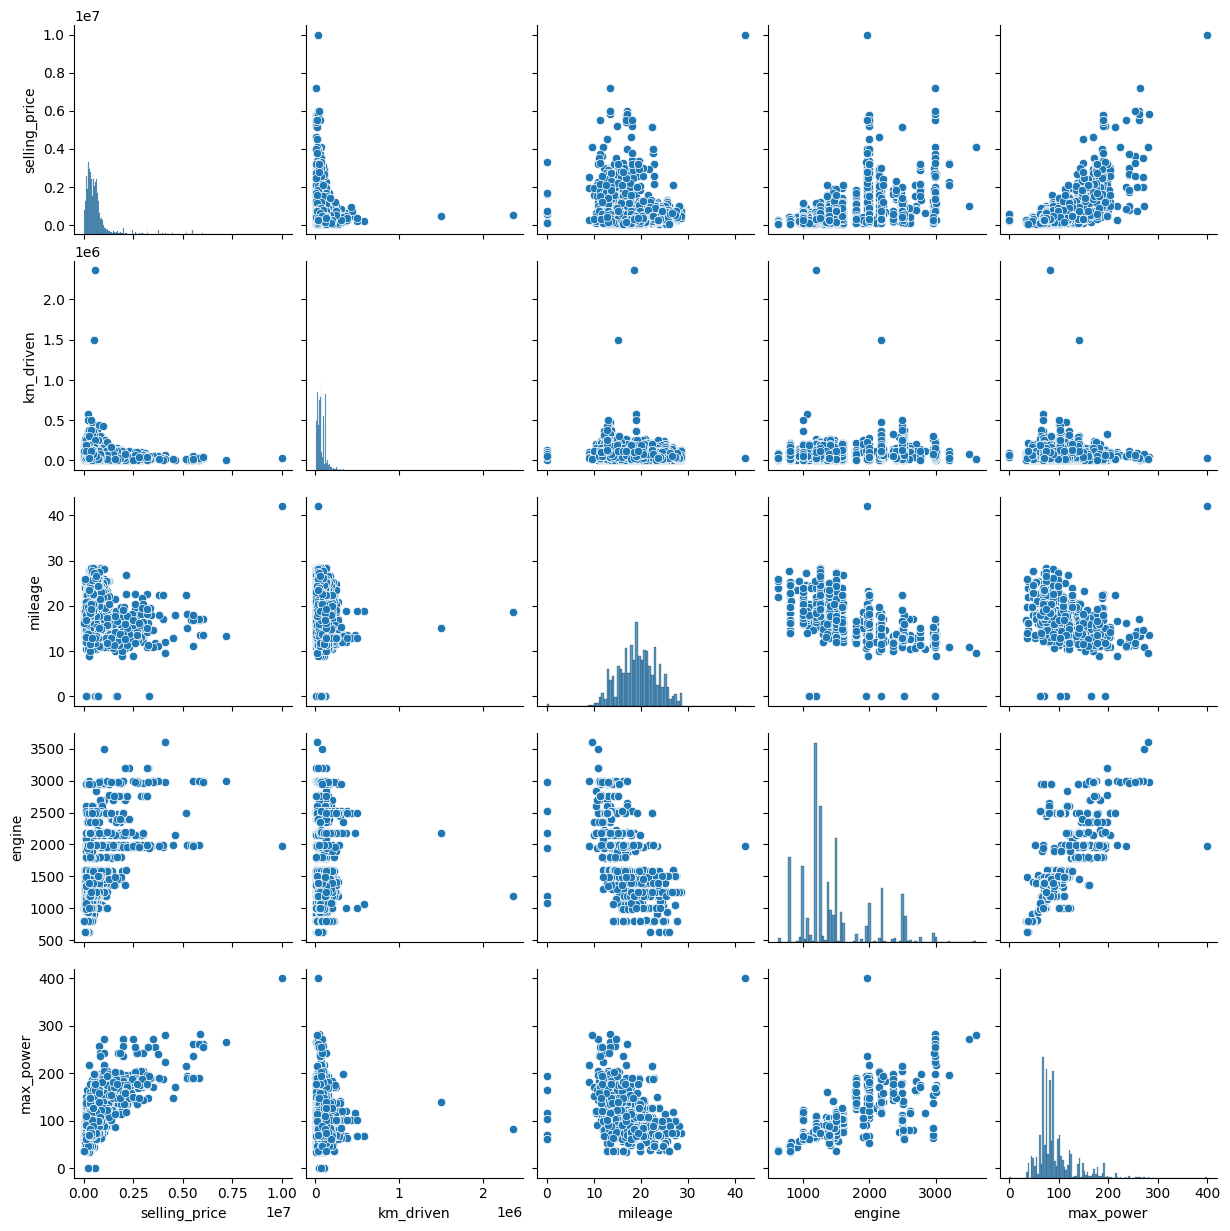

In [37]:
sns.pairplot(df, vars=['selling_price', 'km_driven', 'mileage', 'engine', 'max_power'])

In [38]:
def count_outliers(data, column):
  """Counts the number of outliers in a given column of a DataFrame.

  Args:
    data: The DataFrame containing the data.
    column: The name of the column to analyze.

  Returns:
    The number of outliers in the specified column.
  """

  # Calculate Q1 and Q3
  q1 = data[column].quantile(0.25)
  q3 = data[column].quantile(0.75)

  # Calculate IQR
  iqr = q3 - q1

  # Define lower and upper bounds for outliers
  lower_bound = q1 - 1.5 * iqr
  upper_bound = q3 + 1.5 * iqr

  # Count outliers
  outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
  return len(outliers)

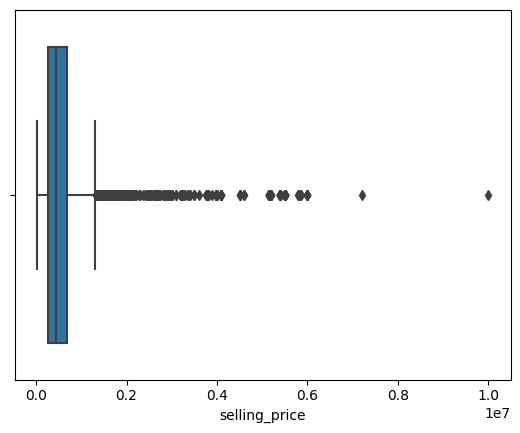

Number of outliers: 595
From all data counts: 8028


In [39]:
# Create boxplot
sns.boxplot(x='selling_price', data=df)
plt.show()
# Count outliers
num_outliers = count_outliers(df, 'selling_price')
print("Number of outliers:", num_outliers )
print("From all data counts:", df['name'].count())

Text(0.5, 0, 'selling_price')

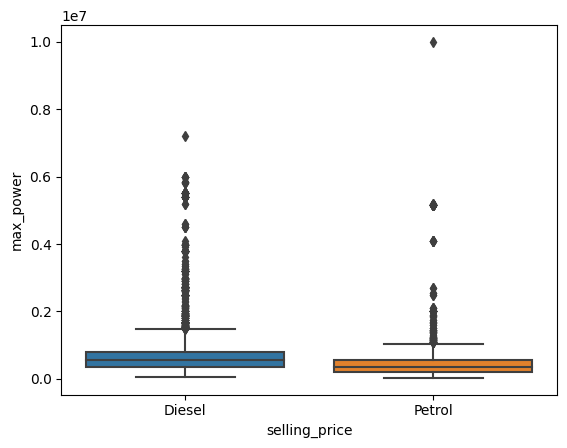

In [40]:
sns.boxplot(x = df['fuel'], y= df['selling_price'], )
plt.ylabel("max_power")
plt.xlabel("selling_price")

In [41]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0


In [42]:
df['transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [43]:
# Define feature we gonna use
# X = df[ ['name', 'year', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats'] ]
# X = df[ [ 'year', 'km_driven', 'owner', 'mileage', 'engine', 'max_power', 'seats'] ]
X = df[['km_driven', 'owner', 'mileage', 'max_power', 'engine']]
# X = df[ [ 'mileage', 'max_power', 'engine'] ]
y = df['selling_price']
# y = np.log(df['selling_price']) 
print(X.shape, y.shape)

(8028, 5) (8028,)


Following the preprocessed version, convert the label selling price	 into discrete variable by simply
putting the price in a bucket of 0, 1, 2, 3, which will result in a 4-class classification problem.

In [44]:
y.min(), y.max()

(29999, 10000000)

data points 7802/8028


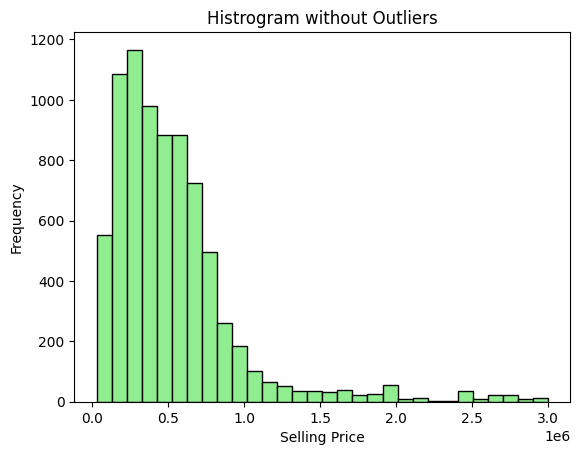

In [45]:
from scipy import stats

# Calculating Z-scores
z_scores = stats.zscore(y)

# Filtering data without outliers
data_without_outliers = y[(z_scores > -3) & (z_scores < 3)]
print(f"data points {data_without_outliers.count()}/{y.count()}")
plt.hist(data_without_outliers, bins=30, color='lightgreen', edgecolor='black')
plt.title('Histrogram without Outliers')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.show()

In [46]:
data_zscore_more_than_3 = y[ (z_scores > 3)]
data_zscore_less_than_3 = y[(z_scores < -3)]
data_zscore_less_than_3.count(), data_zscore_more_than_3.count()
#theres no data z_score < -3 but rather z_score > 3

(0, 226)

In [47]:
y.skew()
#y is hard-skewed to the right

4.168700181816267

In [48]:
#trying to bin using quantile, zscore and KMeans
df['quantile_bin'] = pd.qcut(df['selling_price'], q=4, labels=False)

# Check the resulting bins
df['quantile_bin'].value_counts()

0    2050
1    2044
3    1991
2    1943
Name: quantile_bin, dtype: int64

In [49]:
from scipy.stats import zscore

# Calculate z-scores
df['zscore'] = zscore(df['selling_price'])

# Define bins for z-scores (e.g., based on typical ranges)
df['zscore_bin'] = pd.cut(df['zscore'], bins=[-np.inf, -1, 0, 1, np.inf], labels=False)

df['zscore_bin'].value_counts()

1    5681
2    1789
3     558
Name: zscore_bin, dtype: int64

In [50]:
from sklearn.cluster import KMeans

y = df[['selling_price']].values

# KMeans clustering with 4 clusters (for 4 bins)
kmeans = KMeans(n_clusters=4, random_state=42)
df['kmeans_bin'] = kmeans.fit_predict(y)

# Check the resulting bins
print(df['kmeans_bin'].value_counts())


c:\Users\note3\OneDrive\Desktop\Chaklam's ML\.venv\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\note3\OneDrive\Desktop\Chaklam's ML\.venv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\note3\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\note3\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:

0    5027
3    2546
2     326
1     129
Name: kmeans_bin, dtype: int64


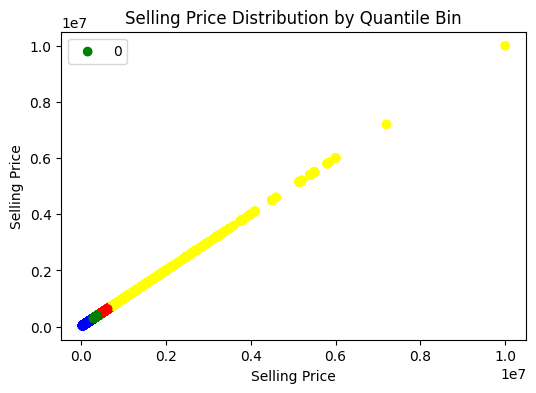

In [51]:
color_map = { 0 : 'blue', 1 : 'green', 2: 'red', 3:'yellow'}

# Create a scatter plot with color based on the quantile bin
plt.figure(figsize=(6, 4))
plt.scatter(df['selling_price'], df['selling_price'], c=df['quantile_bin'].map(color_map))

# Add labels and title
plt.xlabel('Selling Price')
plt.ylabel('Selling Price')
plt.title('Selling Price Distribution by Quantile Bin')

# Add a legend
plt.legend(color_map.keys())

plt.show()

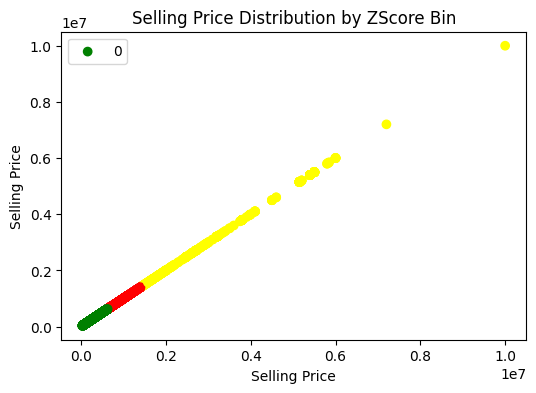

In [52]:
color_map = { 0 : 'blue', 1 : 'green', 2: 'red', 3:'yellow'}

# Create a scatter plot with color based on the quantile bin
plt.figure(figsize=(6, 4))
plt.scatter(df['selling_price'], df['selling_price'], c=df['zscore_bin'].map(color_map))

# Add labels and title
plt.xlabel('Selling Price')
plt.ylabel('Selling Price')
plt.title('Selling Price Distribution by ZScore Bin')

# Add a legend
plt.legend(color_map.keys())

plt.show()

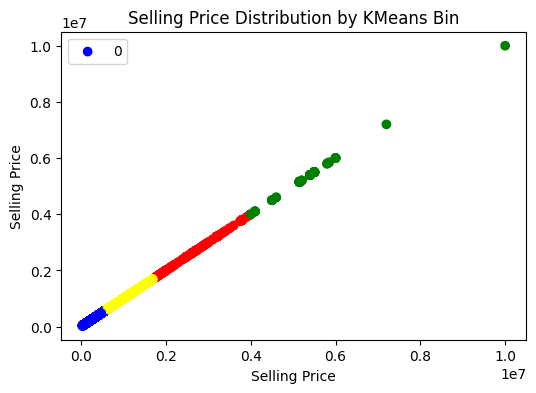

In [53]:
color_map = { 0 : 'blue', 1 : 'green', 2: 'red', 3:'yellow'}

# Create a scatter plot with color based on the quantile bin
plt.figure(figsize=(6, 4))
plt.scatter(df['selling_price'], df['selling_price'], c=df['kmeans_bin'].map(color_map))

# Add labels and title
plt.xlabel('Selling Price')
plt.ylabel('Selling Price')
plt.title('Selling Price Distribution by KMeans Bin')

# Add a legend
plt.legend(color_map.keys())


plt.show()

In [54]:
#from the graphs plotted above, binning by kMeans is looking best when the data is skewed 
y = df['kmeans_bin']

In [55]:
X.head()

,km_driven,owner,mileage,max_power,engine
0,145500,1,23.40,74.00,1248.0
1,120000,2,21.14,103.52,1498.0
2,140000,3,17.70,78.00,1497.0
3,127000,1,23.00,90.00,1396.0
4,120000,1,16.10,88.20,1298.0


Now We Split Train Test

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train.shape, X_test.shape

((7225, 5), (803, 5))

Now We Check For Null Values

In [57]:
X_train.isna().sum()

km_driven      0
owner          0
mileage      199
max_power    193
engine       199
dtype: int64

In [58]:
X_test.isna().sum()

km_driven     0
owner         0
mileage      15
max_power    15
engine       15
dtype: int64

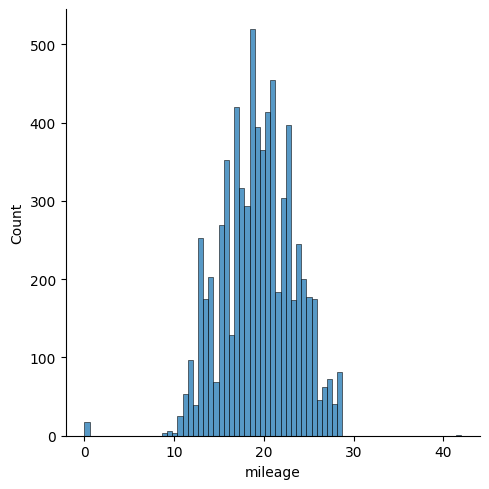

In [59]:
sns.displot(data=X_train, x="mileage")
#Since this is a normal distribution curve, we fill NA with MEAN value

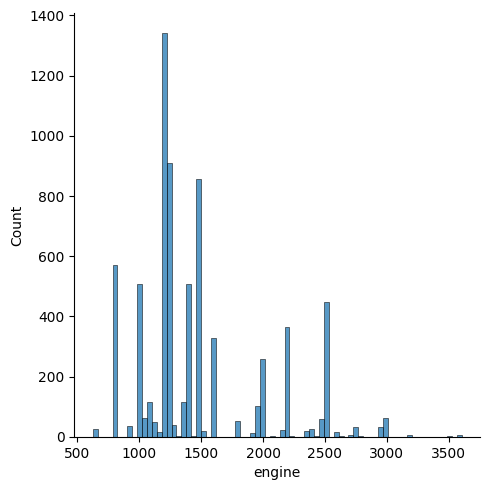

In [60]:
sns.displot(data=X_train, x="engine")
#Since this data curve is skewed, we fill NA with MEDIAN value

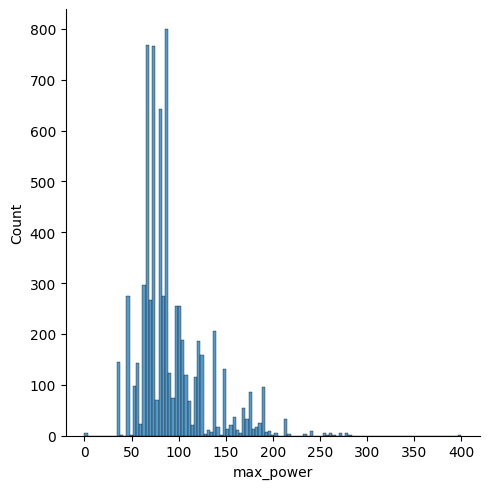

In [61]:
sns.displot(data=X_train, x="max_power")
#Since this data curve is skewed, we fill NA with MEDIAN value

In [62]:
# sns.displot(data=X_train, x="seats")
#Since this data curve is mostly repeated, we fill NA with MODE value

In [63]:
print("These are values we are filling Null Values")
print(f"Mileage Mean: {X_train['mileage'].mean()}")
print(f"Engine Median: {X_train['engine'].median()}") 
print(f"Max_Power Median: {X_train['max_power'].median()}") 
# print(f"Seats Mode: {X_train['seats'].mode()[0] }") 

These are values we are filling Null Values
Mileage Mean: 19.3777853686308
Engine Median: 1248.0
Max_Power Median: 82.85


In [64]:
#Start filling NAs in X_train
X_train['mileage'].fillna(X_train['mileage'].mean(), inplace=True)
X_train['engine'].fillna(X_train['engine'].median(), inplace=True)
X_train['max_power'].fillna(X_train['max_power'].median(), inplace=True)
# X_train['seats'].fillna(X_train['seats'].mode()[0], inplace=True)

# Also Fill max_power column where value equals to 0 with the median
zero_power_indices = X_train[X_train['max_power'] == 0].index
X_train.loc[zero_power_indices] = X_train['max_power'].median()

X_train.isna().sum()

km_driven    0
owner        0
mileage      0
max_power    0
engine       0
dtype: int64

In [65]:
zero_power_indices

Int64Index([1443, 575, 1442, 2550, 576, 2549], dtype='int64')

In [66]:
#Now we filling NAs in X_test
X_test['mileage'].fillna(X_test['mileage'].mean(), inplace=True)
X_test['engine'].fillna(X_test['engine'].median(), inplace=True)
X_test['max_power'].fillna(X_test['max_power'].median(), inplace=True)
# X_test['seats'].fillna(X_test['seats'].mode()[0], inplace=True)
X_test.isna().sum()

# Also Fill max_power column where value equals to 0 with the median
zero_power_indices = X_test[X_test['max_power'] == 0].index
X_test.loc[zero_power_indices] = X_test['max_power'].median()

X_test.isna().sum()

km_driven    0
owner        0
mileage      0
max_power    0
engine       0
dtype: int64

In [67]:
#Then Check for zeros in max_power column
X_train[X_train['max_power']==0]

,km_driven,owner,mileage,max_power,engine


In [68]:
X_test[X_test['max_power']==0]

,km_driven,owner,mileage,max_power,engine


In [69]:
#Then check for NAs in y
y_train.isna().sum()

0

In [70]:
y_test.isna().sum()
#No need to anything cuz no NAs

0

In [71]:
#Simple Unit test to make sure shape is fine
assert(X_test.shape[0] == y_test.shape[0])

In [72]:
assert(X_train.shape[0] == y_train.shape[0])

In [73]:
#Save feature name for later
feature_names = X_train.columns if hasattr(X_train, 'columns') else [f'feature_{i}' for i in range(X_train.shape[1] -1)]
feature_names

Index(['km_driven', 'owner', 'mileage', 'max_power', 'engine'], dtype='object')

In [74]:
X_train.head

<bound method NDFrame.head of       km_driven  owner    mileage  max_power  engine
5385   100000.0    4.0  19.377785      82.85  1248.0
3929    40000.0    1.0  17.570000      88.70  1193.0
778    110000.0    3.0  12.800000     156.00  2953.0
7794    50000.0    2.0  28.090000      88.50  1248.0
3555    68300.0    3.0  19.377785      82.85  1248.0
...         ...    ...        ...        ...     ...
5293    40000.0    1.0  20.360000      78.90  1197.0
5461    39000.0    3.0  20.510000      67.04   998.0
865     14000.0    1.0  20.770000      88.76  1248.0
7701    20000.0    1.0  22.370000     214.56  2487.0
7366    21147.0    1.0  21.400000      83.10  1197.0

[7225 rows x 5 columns]>

In [75]:
#Scaling to make features comparable in the same scale
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) #using the training set distribution to transform X_test

In [76]:
X_train
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

## Classification Metrics Function

In [77]:
def accuracy(y_true, y_pred):
    correct_predictions = np.sum(y_true == y_pred)
    total_predictions = len(y_true)
    return correct_predictions / total_predictions

def precision(tp, fp):
    if tp + fp == 0:
        return 0
    return tp / (tp + fp)

def recall(tp, fn):
    if tp + fn == 0:
        return 0
    return tp / (tp + fn)

def f1_score(precision_c, recall_c):
    if precision_c + recall_c == 0:
        return 0
    return 2 * (precision_c * recall_c) / (precision_c + recall_c)

In [78]:
def classification_report1(y_true, y_pred, labels):
    report = {}
    total_support = len(y_true)  # Total number of instances
    
    # Initialize weighted metrics sums
    weighted_precision_sum = 0
    weighted_recall_sum = 0
    weighted_f1_sum = 0
    
    for label in labels:
        tp = np.sum((y_true == label) & (y_pred == label))
        fp = np.sum((y_true != label) & (y_pred == label))
        fn = np.sum((y_true == label) & (y_pred != label))
        support = np.sum(y_true == label) 
        
        precision_c = precision(tp, fp)
        recall_c = recall(tp, fn)
        f1_c = f1_score(precision_c, recall_c)
        
        # Accumulate weighted metrics
        weighted_precision_sum += precision_c * support
        weighted_recall_sum += recall_c * support
        weighted_f1_sum += f1_c * support
        
        report[label] = {
            'precision': precision_c,
            'recall': recall_c, 
            'f1_score': f1_c,
        }
    
    # Calculate accuracy
    acc = accuracy(y_true, y_pred)
    
    # Calculate macro averages
    precisions = [report[label]['precision'] for label in labels]
    recalls = [report[label]['recall'] for label in labels]
    f1_scores = [report[label]['f1_score'] for label in labels]
    
    macro_precision = np.mean(precisions)
    macro_recall = np.mean(recalls)
    macro_f1 = np.mean(f1_scores)
    
    weighted_precision = weighted_precision_sum / total_support
    weighted_recall = weighted_recall_sum / total_support
    weighted_f1 = weighted_f1_sum / total_support
    
    # Add macro metrics to the report
    report['accuracy'] = acc
    report['macro_precision'] = macro_precision
    report['macro_recall'] = macro_recall
    report['macro_f1'] = macro_f1
    report['weighted_precision'] = weighted_precision
    report['weighted_recall'] = weighted_recall
    report['weighted_f1'] = weighted_f1
    
    return report


In [79]:
y_true = np.array([0, 1, 2, 2, 0, 1, 0, 1, 2, 1])
y_pred = np.array([0, 1, 2, 0, 0, 2, 0, 0, 2, 1])
labels = [0, 1, 2]

#Print Out Report
report = classification_report1(y_true, y_pred, labels)

for label, metrics in report.items():
    if isinstance(metrics, dict):
        print(f"Class {label}:")
        for metric_name, value in metrics.items():
            print(f"  {metric_name}: {value:.2f}")
    else:
        print(f"{label}: {metrics:.2f}")

Class 0:
  precision: 0.60
  recall: 1.00
  f1_score: 0.75
Class 1:
  precision: 1.00
  recall: 0.50
  f1_score: 0.67
Class 2:
  precision: 0.67
  recall: 0.67
  f1_score: 0.67
accuracy: 0.70
macro_precision: 0.76
macro_recall: 0.72
macro_f1: 0.69
weighted_precision: 0.78
weighted_recall: 0.70
weighted_f1: 0.69


In [80]:
#Compare to sklearn classification report
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.60      1.00      0.75         3
           1       1.00      0.50      0.67         4
           2       0.67      0.67      0.67         3

    accuracy                           0.70        10
   macro avg       0.76      0.72      0.69        10
weighted avg       0.78      0.70      0.69        10



In [81]:
#experiment tracking
import mlflow
import os
# This the dockerized method.
# We build two docker containers, one for python/jupyter and another for mlflow.
# The url `mlflow` is resolved into another container within the same composer.
mlflow.set_tracking_uri("http://mlflow.ml.brain.cs.ait.ac.th/")
# mlflow.set_tracking_uri("http://localhost:5000")
# In the dockerized way, the user who runs this code will be `root`.
# The MLflow will also log the run user_id as `root`.
# To change that, we need to set this environ["LOGNAME"] to your name.
os.environ["LOGNAME"] = "chaky"
# mlflow.create_experiment(name="chaky-regularization-example")  #create if you haven't create
mlflow.set_experiment(experiment_name="st124874-a3")

MlflowException: API request to endpoint /api/2.0/mlflow/experiments/get-by-name failed with error code 401 != 200. Response body: 'You are not authenticated. Please see https://www.mlflow.org/docs/latest/auth/index.html#authenticating-to-mlflow on how to authenticate.'

In [1400]:
import numpy as np
#Set up random seed, to ensure that results are reproducible
random_seed = 42  
np.random.seed(random_seed)  

# intercept = np.ones((X_train.shape[0], 1))
# X_train   = np.concatenate((intercept, X_train), axis=1)
# intercept = np.ones((X_test.shape[0], 1))
# X_test    = np.concatenate((intercept, X_test), axis=1)

#change y to ndarray
y_train = np.array(y_train)
y_test = np.array(y_test)

In [1401]:
# #Use SMOTE to oversampling class 1 and 2
# from imblearn.over_sampling import SMOTE
# smote = SMOTE()
# X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
# X_resampled.shape

In [1402]:
# #Use RandomUnderSampler to undersampling class 0 and 3
from imblearn.under_sampling import RandomUnderSampler
undersampler = RandomUnderSampler()
X_resampled, y_resampled = undersampler.fit_resample(X_train, y_train)
X_resampled.shape

(452, 5)

In [1403]:
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

In [1404]:
import numpy as np

class MultinomialLogisticRegression:
    def __init__(self, regularization, learning_rate=0.01, epochs=1000, num_classes=4):
        self.regularization = regularization
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.num_classes = num_classes
        self.intercept_ = None

    def softmax(self, Z):
        exp_Z = np.exp(Z - np.max(Z, axis=1, keepdims=True))  # For numerical stability
        return exp_Z / np.sum(exp_Z, axis=1, keepdims=True)

    def cross_entropy_loss(self, A, y):
        m = y.shape[0]
        log_likelihood = -np.log(A[range(m), y])
        loss = np.sum(log_likelihood) / m
        return loss

    def gradient(self, X, A, y):
        m = X.shape[0]
        A[range(m), y] -= 1  # Subtract 1 from the correct class probabilities
        grad_theta = np.dot(X.T, A) / m
        grad_intercept = np.sum(A, axis=0) / m  # Gradient for intercept term
        return grad_theta, grad_intercept

    def fit(self, X, y):
        m, n_features = X.shape
        
        # Initialize weights (theta) and intercept
        self.theta = np.random.randn(n_features, self.num_classes) * 0.01
        self.intercept_ = np.zeros(self.num_classes)  # Initialize intercepts

        for epoch in range(self.epochs):
            # Forward pass: calculate predictions
            Z = np.dot(X, self.theta) + self.intercept_  # Include intercept
            A = self.softmax(Z)

            # Compute the loss with regularization
            loss = self.cross_entropy_loss(A, y)
            loss += self.regularization(self.theta)  # Add penalty to the loss

            # Backward pass: compute gradients
            grad_theta, grad_intercept = self.gradient(X, A, y)
            grad_theta += self.regularization.derivation(self.theta)  # Add penalty to the gradient

            # Update weights and intercept
            self.theta -= self.learning_rate * grad_theta
            self.intercept_ -= self.learning_rate * grad_intercept

            if epoch % 100 == 0:
                print(f'Epoch {epoch}, Loss: {loss}')

    def predict(self, X):
        Z = np.dot(X, self.theta) + self.intercept_  # Include intercept in prediction
        A = self.softmax(Z)
        return np.argmax(A, axis=1)  # Return class with the highest probability


ValueError: shapes (452,) and (5,4) not aligned: 452 (dim 0) != 5 (dim 0)

In [1405]:
class RidgePenalty:
    def __init__(self, l):
        self.l = l

    def __call__(self, theta):  # __call__ allows us to call the class as a method
        return self.l * np.sum(np.square(theta))

    def derivation(self, theta):
        return self.l * 2 * theta


class LinearPenalty:
    def __init__(self, l):
        self.l = l  

    def __call__(self, theta): 
        return self.l * np.sum(np.abs(theta))

    def derivation(self, theta):
        return self.l * np.sign(theta)
    
    
class Ridge(MultinomialLogisticRegression):
    def __init__(self, learning_rate, l, epochs=1000):
        regularization = RidgePenalty(l)
        super().__init__(regularization, learning_rate, epochs)


class Linear(MultinomialLogisticRegression):
    def __init__(self, learning_rate, l, epochs=1000):
        regularization = LinearPenalty(l)
        super().__init__(regularization, learning_rate, epochs)

## Experiment

In [1406]:
#helper function for looping classnames
import sys

def str_to_class(classname):
    return getattr(sys.modules[__name__], classname)

In [1407]:
import pickle

regs = ["Linear", "Ridge"]
labels = [0, 1, 2, 3]

best_model = None
best_accuracy = 0

# For Loop through all combinations of parameters from above to train the best model
for reg in regs:
    params = {"learning_rate": 0.01, "l": 0.1}  # Replace 'l' with 'alpha' for Ridge/Lasso


    with mlflow.start_run(run_name=f"Reg-{reg}-classification", nested=True):
        print("="*5, reg, "="*5)

        # Dynamically assign the classification model based on `reg`
        type_of_classification = str_to_class(reg)  # Example: Ridge, Lasso, ElasticNet
        model = type_of_classification(**params)

        # Fit the model
        model.fit(X_resampled, y_resampled)

        # Predict on test data
        yhat = model.predict(X_test)

        # Generate classification report
        report = classification_report(y_test, yhat, labels=labels, output_dict=True)

        # Log metrics to MLflow
        for i in labels:
            mlflow.log_metric(f"c{i}_precision", report[str(i)]['precision'])
            mlflow.log_metric(f"c{i}_recall", report[str(i)]['recall'])
            mlflow.log_metric(f"c{i}_f1_score", report[str(i)]['f1-score'])

        # Log overall metrics
        mlflow.log_metric("accuracy", report['accuracy'])
        mlflow.log_metric("macro_precision", report['macro avg']['precision'])
        mlflow.log_metric("macro_recall", report['macro avg']['recall'])
        mlflow.log_metric("macro_f1", report['macro avg']['f1-score'])
        mlflow.log_metric("weighted_precision", report['weighted avg']['precision'])
        mlflow.log_metric("weighted_recall", report['weighted avg']['recall'])
        mlflow.log_metric("weighted_f1", report['weighted avg']['f1-score'])

        # Save the best model
        current_accuracy = report['accuracy']
        if current_accuracy > best_accuracy:
            best_accuracy = current_accuracy
            best_model = model

            # Save the best model as a pickle file
            with open("car_pred_model3.pkl", "wb") as f:
                pickle.dump(best_model, f)
            print(f"New best model saved with accuracy: {best_accuracy}")

        # Log the model to MLflow with signature
        signature = mlflow.models.infer_signature(X_train, model.predict(X_train))
        mlflow.sklearn.log_model(model, artifact_path='model', signature=signature)

        mlflow.end_run()


===== Linear =====
Epoch 0, Loss: 1.393459537919866
Epoch 100, Loss: 1.2589626101405453
Epoch 200, Loss: 1.2246624393595575
Epoch 300, Loss: 1.2045019002471031
Epoch 400, Loss: 1.189338688601139
Epoch 500, Loss: 1.1767921106931727
Epoch 600, Loss: 1.167020307009596
Epoch 700, Loss: 1.15854326412946
Epoch 800, Loss: 1.1522702103675042
Epoch 900, Loss: 1.146929149850945
New best model saved with accuracy: 0.6500622665006227


c:\Users\note3\OneDrive\Desktop\Chaklam's ML\.venv\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
c:\Users\note3\OneDrive\Desktop\Chaklam's ML\.venv\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
2024/10/06 19:39:02 INFO mlflow.tracking._tracking_service.client: 🏃 View run Reg-Linear-classification at: http://localhost:5000/#/experiments/1/runs/3b795948a5a64f8b87c0c8066a09447a.
2024/10/06 19:39:02 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http

===== Ridge =====
Epoch 0, Loss: 1.383402635314817
Epoch 100, Loss: 1.1415386796353502
Epoch 200, Loss: 1.092540083446063
Epoch 300, Loss: 1.064904520958184
Epoch 400, Loss: 1.0457544849648703
Epoch 500, Loss: 1.0315308506936822
Epoch 600, Loss: 1.0205845992869804
Epoch 700, Loss: 1.0119662788338244
Epoch 800, Loss: 1.0050676882418623
Epoch 900, Loss: 0.9994741098429873
New best model saved with accuracy: 0.7459526774595268


c:\Users\note3\OneDrive\Desktop\Chaklam's ML\.venv\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
c:\Users\note3\OneDrive\Desktop\Chaklam's ML\.venv\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
2024/10/06 19:39:07 INFO mlflow.tracking._tracking_service.client: 🏃 View run Reg-Ridge-classification at: http://localhost:5000/#/experiments/1/runs/9252f67cb4b341c3bf1d4e468f22147f.
2024/10/06 19:39:07 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http:

In [1408]:
#dump and load model to test
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
    
with open('car_pred_model3.pkl', 'rb') as f:
    testmodel = pickle.load(f)
    
# Use the model for predictions
y_pred = testmodel.predict(X_test)

array([[ 0.26248476, -0.17944443, -0.04750454, -0.03530905],
       [ 0.08441981, -0.00191291, -0.01152536, -0.07621049],
       [-0.08818358,  0.14321355, -0.14830197,  0.08993515],
       [-0.4874837 ,  0.50842279,  0.24107437, -0.2567538 ],
       [-0.25099364,  0.1073604 ,  0.17928623, -0.03334112]])

In [1409]:
y_pred

array([0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 3, 0, 2, 0, 0, 0,
       3, 0, 2, 1, 0, 3, 0, 0, 3, 3, 0, 0, 3, 0, 2, 3, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 3, 0, 0, 3, 3, 0, 1, 0, 3, 0, 0, 0, 3, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 3, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0,
       0, 0, 0, 0, 3, 2, 3, 0, 1, 0, 1, 0, 0, 1, 2, 0, 2, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 3, 3, 3, 3, 0, 0, 3, 1, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 3, 3, 0, 0, 3, 0, 0, 2, 3, 2, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0,
       3, 0, 0, 2, 0, 0, 0, 0, 0, 3, 0, 3, 0, 0, 0, 0, 3, 0, 1, 1, 0, 0,
       0, 0, 0, 3, 0, 2, 0, 0, 0, 0, 3, 0, 0, 2, 2, 1, 0, 2, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 3, 2, 0, 0, 0, 3, 0, 0, 0, 2, 0, 1, 0, 3, 3, 0, 0,
       0, 0, 2, 0, 0, 1, 0, 0, 0, 3, 2, 0, 0, 2, 3, 0, 2, 0, 0, 0, 0, 0,
       3, 0, 0, 0, 3, 3, 0, 3, 2, 0, 0, 3, 0, 3, 0, 2, 0, 3, 3, 2, 0, 0,
       0, 0, 3, 3, 0, 0, 3, 0, 2, 3, 0, 3, 0, 0, 0,

In [ ]:
#code change test20